2.8. Итоговое задание
===

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

Описание датасета
===
Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

Рекомендации по выполнению проекта
===
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
1. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
1. Оцените количество уникальных значений для номинативных переменных.
1. По необходимости преобразуйте данные
1. Проведите корреляционный анализ количественных переменных
1. Отберите не коррелирующие переменные.
1. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
1. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

Цели и задачи проекта
===
Провести EDA. Очистить данные. Отобрать значимые для модели столбцы.

0) Инициализация
===

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from collections import OrderedDict

In [171]:
students = pd.read_csv('stud_math.csv')

In [172]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [173]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [174]:
print(list(students))

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


1) Первичная обработка
===

Изначально был отдельный подход к числовым и номинативным признакам.

Также изначально не исправил пробелы, а только убрал выбросы.

@Komissarov Artem поделился функцией и я всё переписал на универсальный код.
```
def unique_nan_value(name):
    '''Функция показывает все значения в колонке, а так же уникальные и пустые'''
    uniq = math[name].nunique()
    empty = math[name].isnull().sum()
    values = math[name].value_counts()
    print(f'Значения в колонке: Уникальные: {uniq}, Пустые: {empty}. \n{values}' )
```

In [175]:
# Оставлено для примера, более не используется
to_drop_leftovers={} #для сбора столбцов с выбросами
def drop_leftovers():
  '''Процедура избавления от выбросов. Приходится проходить дважды,
     так как есть записы с выбросами сразу по двум параметрам.'''
  global students, to_drop_leftovers
  df = students
  print('План очистки от выбросов')
  for (column,range) in to_drop_leftovers.items():
    drop_count = (df[column]<range[0]).sum() + (df[column]>range[1]).sum()
    print(f'Из столбца {column} выбросим {drop_count} значений')
  print()
  print('Факт очистки от выбросов')
  for (column,range) in to_drop_leftovers.items():
    drop_count = (df[column]<range[0]).sum() + (df[column]>range[1]).sum()
    print(f'Из столбца {column} выбросим {drop_count} значений')
    df = df.loc[df[column] >= range[0]]
    df = df.loc[df[column] <= range[1]]
  students = df

In [176]:
analized_columns={} # информация о проверенных столбцах

In [177]:
def calculate_leftovers(column,**kwargs):
  '''Процедура анализа рапределения с применением IQR и предложенных рамок'''
  global students
  min_border = students[column].min()
  perc25 = students[column].quantile(0.25)
  perc50 = students[column].quantile(0.50)
  perc75 = students[column].quantile(0.75)
  max_border = students[column].max()
  IQR = perc75 - perc25
  low_border = perc25 - 1.5*IQR
  high_border = perc75 + 1.5*IQR
  
  if 'low' in kwargs.keys():
    if kwargs['low'] != None:
      min_border = kwargs['low']
  if 'high' in kwargs.keys():
    if kwargs['high'] != None:
      max_border = kwargs['high']
  print('','below', 'low', '25', '50', '75', 'high', 'above', sep='\t')
  print('IQR', students.query(column+'<@low_border')[column].count(), \
        low_border, perc25, \
        students[column].quantile(0.50),
        perc75, high_border, \
        students.query(column+'>@high_border')[column].count(), sep='\t')
  students[column].loc[students[column].between(low_border,high_border)] \
    .hist(range = (min_border, max_border), label = 'IQR')

  if 'low' in kwargs.keys():
    if kwargs['low'] != None:
      low_border = kwargs['low']
  if 'high' in kwargs.keys():
    if kwargs['low'] != None:
      high_border = kwargs['high']
  print('user', students.query(column+'<@low_border')[column].count(), \
        low_border, perc25, \
        students[column].quantile(0.50),
        perc75, high_border, \
        students.query(column+'>@high_border')[column].count(), sep='\t')
  print()
  students[column].loc[students[column].between(low_border,high_border)] \
    .hist(range = (min_border, max_border), alpha = 0.5, label = 'Supposed')

  plt.legend();
  display(plt.plot(students[column].loc[students[column]\
                                        .between(min_border,max_border)]\
                   .value_counts().sort_index()))   

In [205]:
students['Fedu'].dtype==type(object)

False

In [212]:
def scrutinize_column(column, calc_left=True):
  '''Процедура детального анализа столбцов'''
  global students, analized_columns
  if students[column].dtype==type(object):
    calc_left=False
    mean='N/A'
    std='N/A'
  else:
    mean='{:+.3f}'.format(students[column].mean())
    std='{:+.3f}'.format(students[column].std())
  print('count','null','unique','relev','mean','std',sep='\t')
  print(students[column].count(),
        students[column].isnull().sum(), \
        students[column].nunique(),
        (students[column].value_counts()>students[column].count()/100*5).sum(),
        mean,
        std,
        sep='\t')
  print()
  display(students[column].unique().sort_index().tolist())
  display(pd.DataFrame(students[column].value_counts(dropna=False)).transpose())
  #print()
  #students.loc[:, [column]].info(memory_usage='deep')
  if type(calc_left)==type(True) and calc_left:
    calc_left = (None,None)
    if column in analized_columns.keys():
      if 'borders' in analized_columns[column].keys():
        calc_left = analized_columns[column]['borders']
  if type(calc_left)==type((0,0)):
    print()
    calculate_leftovers(column, \
                        low=calc_left[0], \
                        high=calc_left[1])

In [181]:
def make_replaces():
  global students, analized_columns
  for (column,data) in to_replace_values.items():
    if 'replaces' in data.keys():
      for old_value in data['replaces'][1]:
        if old_value is np.nan or old_value is None:
          replace_count = students[column].isnull().sum()
          students[column].fillna(inplace=True, value=data['replaces'][0])
        else:
          replace_count = (students[column]==old_value).sum()
          students[column].replace(inplace=True, to_replace=old_value, value=data['replaces'][0])
        print(f'{replace_count} раз в столбце {column} заменим {old_value} на {data["replaces"][0]}')


In [ ]:
'''При корреляционном анализе обнаружился этот столбец. Это явно копия другого
   столбца смещённая для обфускации. Запятая ломала применяемые самопальные
   процедуры вот и пришлось переименовать хоть и после надо совсем выкинуть'''
students.rename(inplace=True, \
                columns={'studytime, granular':'studytime_granular'})

2) Численные признаки
===

In [ ]:
scrutinize_number_column('age', low=15, high=22)
# Без выбросов
# Возможно стоит рассматривать группы 15-19 и 20-22 отдельно,
# ввиду малочисленности второй

In [ ]:
scrutinize_number_column('Medu', low=0, high=4)
#Без выбросов

In [213]:
scrutinize_column('address')

count	null	unique	relev	mean	std
378	17	2	2	N/A	N/A



AttributeError: ignored

count	null	unique	relev	mean	std
371	24	6	4	+2.615	+2.229



[0.0, 1.0, 2.0, 3.0, 4.0, 40.0, nan]

,2.0,3.0,4.0,1.0,NaN,0.0,40.0
Fedu,106,96,88,78,24,2,1



	below	low	25	50	75	high	above
IQR	2	0.5	2.0	2.0	3.0	4.5	1
user	0	0	2.0	2.0	3.0	4	1



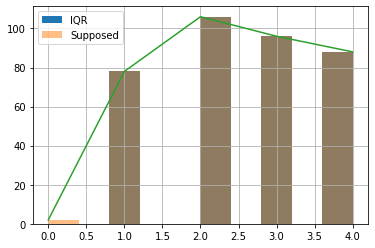

In [185]:
scrutinize_column('Fedu')
# Есть выбросы, Есть пробелы
analized_columns['Fedu'] = {'borders':(0,4),'replaces':(students['Fedu'].mode()[0],[40,None])}

null		unique		count		mean		std
28		4		367		1.438692098092643		0.6941806748311099



[2.0, 1.0, 3.0, nan, 4.0]

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64


	below	low	25	50	75	high	above
IQR	0	-0.5	1.0	1.0	2.0	3.5	7
user	0	1	1.0	1.0	2.0	4	0



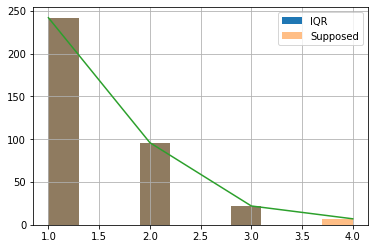

In [ ]:
scrutinize_number_column('traveltime', low=1, high=4)
#Без выбросов

null		unique		count		mean		std
7		4		388		2.038659793814433		0.8420783061121849



[2.0, 3.0, 1.0, nan, 4.0]

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64


	below	low	25	50	75	high	above
IQR	0	-0.5	1.0	2.0	2.0	3.5	27
user	0	1	1.0	2.0	2.0	4	0



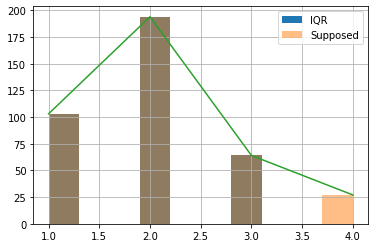

In [ ]:
scrutinize_number_column('studytime', low=1, high=4)
#Без выбросов

null		unique		count		mean		std
7		4		388		-6.115979381443299		2.526234918336546



[-6.0, -9.0, -3.0, nan, -12.0]

-6.0     194
-3.0     103
-9.0      64
-12.0     27
 NaN       7
Name: studytime_granular, dtype: int64


	below	low	25	50	75	high	above
IQR	27	-10.5	-6.0	-6.0	-3.0	1.5	0
user	0	-12	-6.0	-6.0	-3.0	-3	0



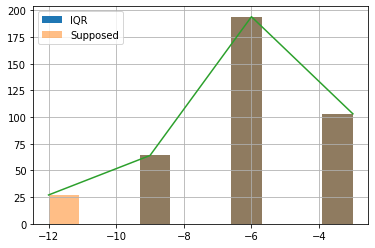

In [ ]:
scrutinize_number_column('studytime_granular',low=-12,high=-3)
#Без выбросов, но после корреляционного анализа придётся выбросить целиком

null		unique		count		mean		std
22		4		373		0.3378016085790885		0.7431352452905915



[0.0, 3.0, nan, 2.0, 1.0]

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64


	below	low	25	50	75	high	above
IQR	0	0.0	0.0	0.0	0.0	0.0	80
user	0	0	0.0	0.0	0.0	3	0



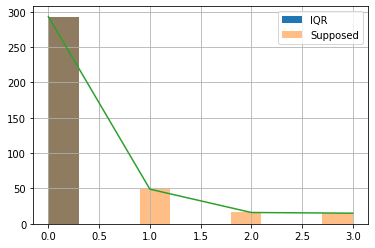

In [ ]:
scrutinize_number_column('failures', low=0, high=3)
#Без выбросов

null		unique		count		mean		std
27		6		368		3.9375		0.9272773717991188



[4.0, 5.0, 3.0, nan, -1.0, 2.0, 1.0]

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


	below	low	25	50	75	high	above
IQR	25	2.5	4.0	4.0	5.0	6.5	0
user	1	1	4.0	4.0	5.0	5	0



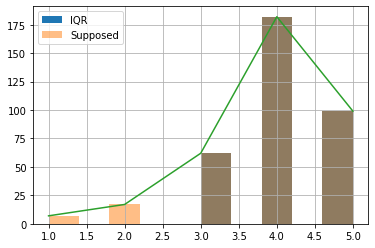

In [ ]:
scrutinize_number_column('famrel', low=1, high=5)
#Есть выброс
to_drop_leftovers['famrel'] = (1,5)

null		unique		count		mean		std
11		5		384		3.2317708333333335		0.9939403818104774



[3.0, 2.0, 4.0, 1.0, 5.0, nan]

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64


	below	low	25	50	75	high	above
IQR	18	1.5	3.0	3.0	4.0	5.5	0
user	0	1	3.0	3.0	4.0	5	0



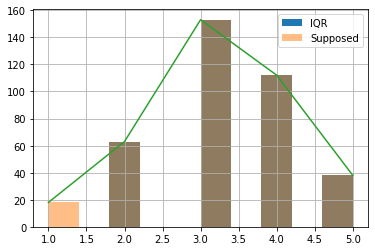

In [ ]:
scrutinize_number_column('freetime', low=1, high=5)
#Без выбросов

null		unique		count		mean		std
8		5		387		3.1059431524547803		1.115895897828766



[4.0, 3.0, 2.0, 1.0, 5.0, nan]

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64


	below	low	25	50	75	high	above
IQR	0	-1.0	2.0	3.0	4.0	7.0	0
user	0	1	2.0	3.0	4.0	5	0



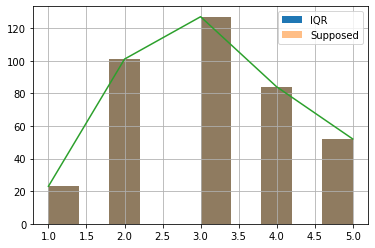

In [ ]:
scrutinize_number_column('goout', low=1, high=5)
#Без выбросов

null		unique		count		mean		std
15		5		380		3.531578947368421		1.3960187007158011



[3.0, 5.0, 1.0, 2.0, 4.0, nan]

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64


	below	low	25	50	75	high	above
IQR	0	0.0	3.0	4.0	5.0	8.0	0
user	0	1	3.0	4.0	5.0	5	0



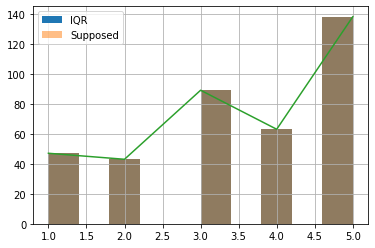

In [ ]:
scrutinize_number_column('health', low=1, high=5)
#Без выбросов

null		unique		count		mean		std
12		36		383		7.2793733681462145		23.46519685578298



[6.0,
 4.0,
 10.0,
 2.0,
 0.0,
 16.0,
 nan,
 14.0,
 7.0,
 8.0,
 25.0,
 12.0,
 54.0,
 18.0,
 26.0,
 20.0,
 56.0,
 24.0,
 28.0,
 5.0,
 13.0,
 15.0,
 22.0,
 3.0,
 385.0,
 21.0,
 1.0,
 75.0,
 30.0,
 19.0,
 9.0,
 11.0,
 38.0,
 40.0,
 23.0,
 17.0,
 212.0]

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


	below	low	25	50	75	high	above
IQR	0	-12.0	0.0	4.0	8.0	20.0	17
user	0	0	0.0	4.0	8.0	30	7



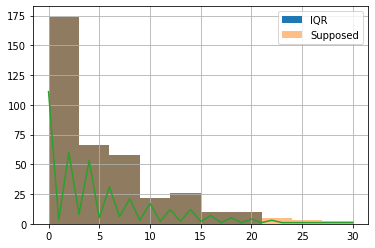

In [ ]:
scrutinize_number_column('absences', low=0, high=30)
#Есть выбросы
#Доверимся IQR
to_drop_leftovers['absences']=(0,20)

null		unique		count		mean		std
6		18		389		52.26221079691517		22.919022312471654



[30.0,
 50.0,
 75.0,
 55.0,
 95.0,
 45.0,
 60.0,
 70.0,
 80.0,
 25.0,
 40.0,
 85.0,
 90.0,
 65.0,
 100.0,
 35.0,
 0.0,
 nan,
 20.0]

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


	below	low	25	50	75	high	above
IQR	0	-5.0	40.0	55.0	70.0	115.0	0
user	0	0	40.0	55.0	70.0	100	0



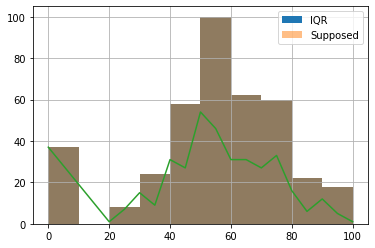

In [ ]:
scrutinize_number_column('score', low=0, high=100)
#Без выбросов

3) Номинативные признаки
===

In [ ]:
scrutinize_nominative_column('school')

unique	 2
relev	 2
count	 395



,school
GP,349
MS,46



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 22.9 KB


In [ ]:
scrutinize_nominative_column('sex')

unique	 2
relev	 2
count	 395



,sex
F,208
M,187



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 25.6 KB


In [ ]:
scrutinize_nominative_column('address')

unique	 2
relev	 2
count	 378



,address
U,295
R,83



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 25.0 KB


In [ ]:
scrutinize_nominative_column('famsize')

unique	 2
relev	 2
count	 368



,famsize
GT3,261
LE3,107



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 22.5 KB


In [ ]:
scrutinize_nominative_column('Pstatus')

unique	 2
relev	 2
count	 350



,Pstatus
T,314
A,36



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 24.1 KB


In [ ]:
scrutinize_nominative_column('Mjob')

unique	 5
relev	 5
count	 376



,Mjob
other,133
services,98
at_home,58
teacher,55
health,32



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 24.0 KB


In [ ]:
scrutinize_nominative_column('Fjob')

unique	 5
relev	 5
count	 359



,Fjob
other,197
services,102
teacher,29
at_home,16
health,15



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 23.4 KB


In [ ]:
scrutinize_nominative_column('reason')

unique	 4
relev	 4
count	 378



,reason
course,137
home,104
reputation,103
other,34



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 24.1 KB


In [ ]:
scrutinize_nominative_column('guardian')

unique	 3
relev	 3
count	 364



,guardian
mother,250
father,86
other,28



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 23.5 KB


In [ ]:
scrutinize_nominative_column('schoolsup')

unique	 2
relev	 2
count	 386



,schoolsup
no,335
yes,51



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 22.7 KB


In [ ]:
scrutinize_nominative_column('famsup')

unique	 2
relev	 2
count	 356



,famsup
yes,219
no,137



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 22.1 KB


In [ ]:
scrutinize_nominative_column('paid')

unique	 2
relev	 2
count	 355



,paid
no,200
yes,155



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 22.0 KB


In [ ]:
scrutinize_nominative_column('activities')

unique	 2
relev	 2
count	 381



,activities
yes,195
no,186



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 22.7 KB


In [ ]:
scrutinize_nominative_column('nursery')

unique	 2
relev	 2
count	 379



,nursery
yes,300
no,79



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 22.8 KB


In [ ]:
scrutinize_nominative_column('higher')

unique	 2
relev	 2
count	 375



,higher
yes,356
no,19



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 22.7 KB


In [ ]:
scrutinize_nominative_column('internet')

unique	 2
relev	 2
count	 361



,internet
yes,305
no,56



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 22.3 KB


In [ ]:
scrutinize_nominative_column('romantic')

unique	 2
relev	 2
count	 364



,romantic
no,240
yes,124



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 22.2 KB


Номинативные данные полные и чисты как слеза младенца.

4) Преобразование
===

In [ ]:
display(to_drop_leftovers)
drop_leftovers()

{'Fedu': (0, 4), 'absences': (0, 20), 'famrel': (1, 5)}

План очистки от выбросов
Из столбца Fedu выбросим 1 значений
Из столбца famrel выбросим 1 значений
Из столбца absences выбросим 17 значений

Факт очистки от выбросов
Из столбца Fedu выбросим 1 значений
Из столбца famrel выбросим 1 значений
Из столбца absences выбросим 15 значений


5) Корреляционный анализ
===

In [ ]:
 #sns.pairplot(students, kind = 'reg')

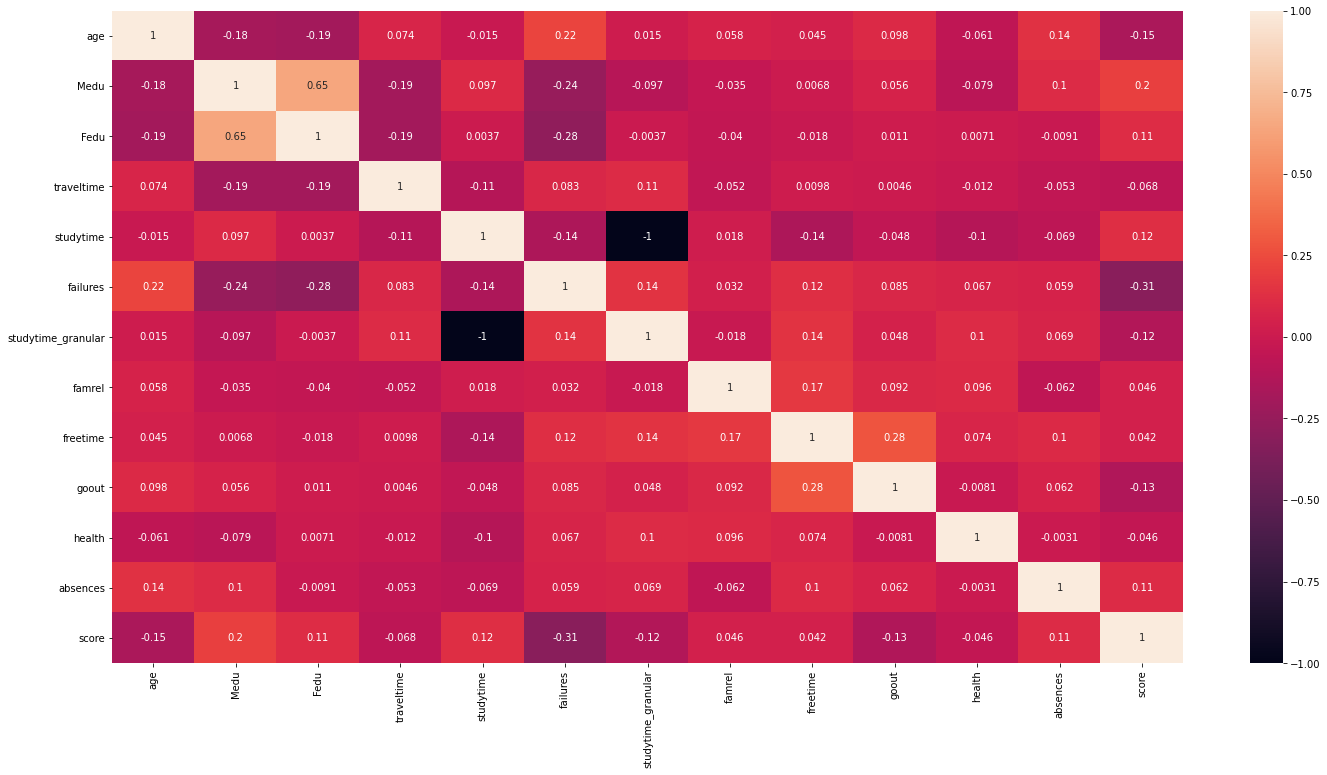

In [ ]:
sns.heatmap(students.corr(), annot=True)
plt.gcf().set_size_inches(24, 12)

In [ ]:
#Отбросим лишнее сразу
students.drop(inplace=True, columns=('studytime_granular'))

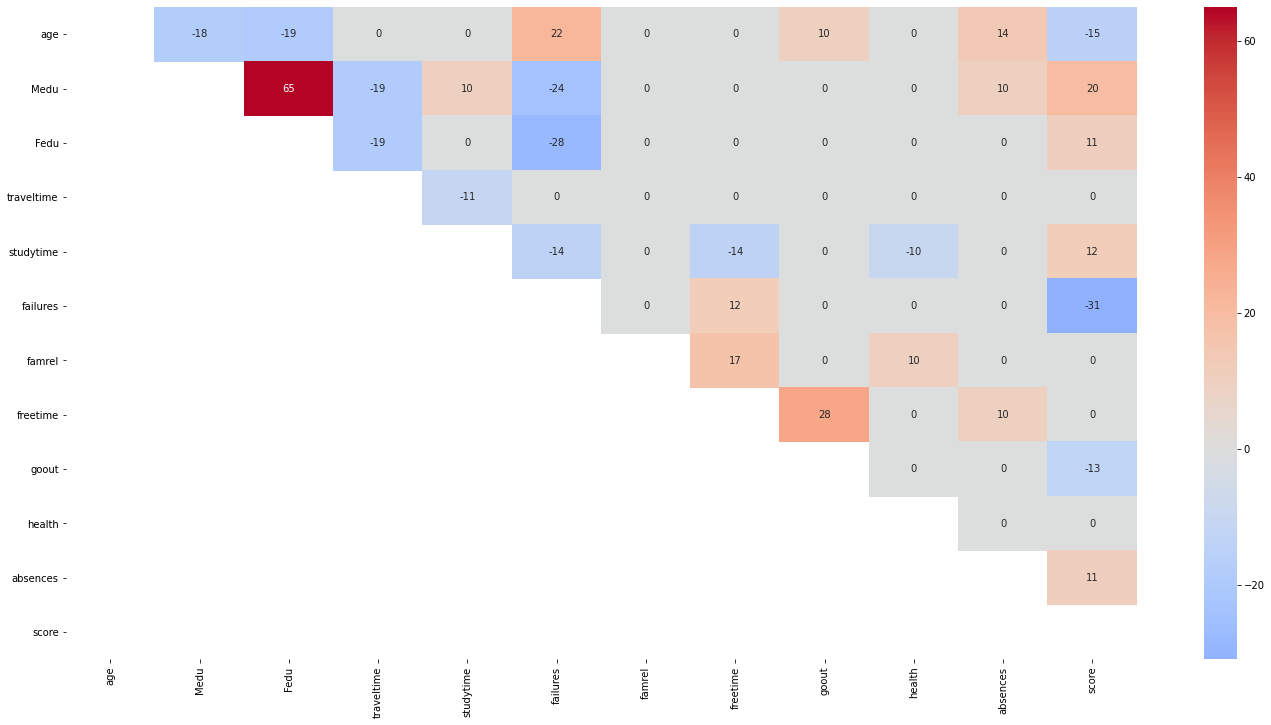

In [ ]:
matrix = np.tril(students.corr())
corr = students.corr().applymap(lambda x: 0 if abs(round(x,2))<0.1 else round(x*100))
sns.heatmap(corr, annot=True, mask=matrix, center= 0, cmap= 'coolwarm')
plt.gcf().set_size_inches(24, 12)

Пойманные за хвост мысли
- **studytime_granular** первый к выбросу как завуалированная копия **studytime**
- 
- У менее **age** учеников более **Medu** и **Fedu**, значит общий уровень образования повышается со временем или образованные родители заводят детей позднее.
- С возрастом приходит склонность к **absences**, больше возможносей заполучить **failures** и требуется больше времени на **goout** всё это негативно сказывается на **score**.
- 
- Сильная корреляция **Medu** и **Fedu** говорит, что родители чаще образуют пары из равных по уровню познания мира. Возможно стоит заменить этот параметр на общий уровень образования родителей.
- Отрицательная корреляция **Medu** и **Fedu** с количесвом **failures** и **traveltime** может указывать на лучшее планировании безопасности и свободного времени среди образованных пар.
- Кореляция **score** с **Medu** больше чем с **Fedu**, значит, что более образованные матери более требовательны к **studytime**, хоть это и приводит в результате к большим **absences**.
- 
- Отрицательная корреляция **traveltime** и **studytime** выглядит логично. И только.
-
- Отрицательная корреляция **studytime** с **freetime**, **failures**, **health**, выглядит логично - занят сидением за учебниками, а не приключениями и зарабатываением опыта. Зато это положительно влияет на **score**.
- 
- Корелляция **failures** и **freetime** логична. За учебником сильно не порискуешь. А результат рисков очень негативен для **score**.
-
- Корреляция **famrel** с **freetime** и **health** свидетульствует о взаимопомощи и отсутствии стресса. Жаль, что этого не достаточно для влияния на оценки.
- 
- Корреляция **freetime** и **goout** указывают источник интереснее учёбы, но привыкаешь, что даже **absences** растут. Благо оценки от этого не страдают.
-
- А вот тупо **goout** отупляет обоих и плохо сказывается на **score**.
-
- **health** не влияет на **score** никак. Тело и мозг независимы :-)
-
- А вот за **absences** неожиданно положительно влияет на **score**. Возможно из-за совести учащегося или родителей. Иначе бы свободное время так же положительно влияло, как и внеплановый отдых.



К сожалению я не упею перевести все пораметры в числовые для подобного анализа, да и навык другого подхода к анализу номинативных признаков должен быть.

Не мудрствуя лукаво применим подход из примера.

In [ ]:
def get_boxplot(column):
    global students
    print(column)
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

school


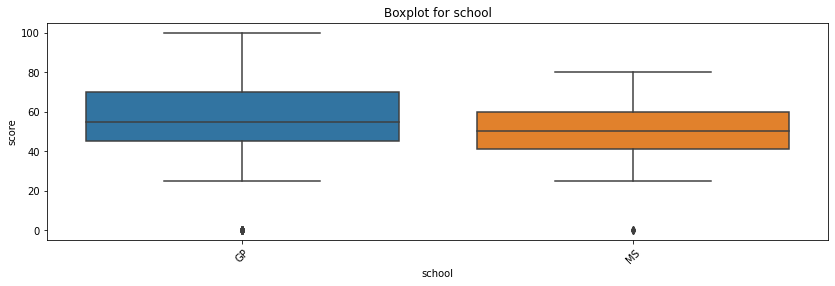

sex


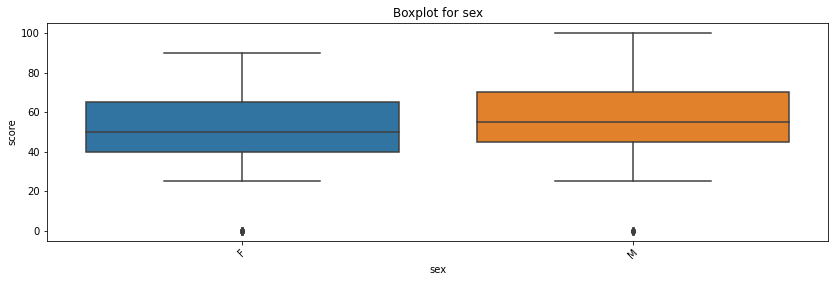

age


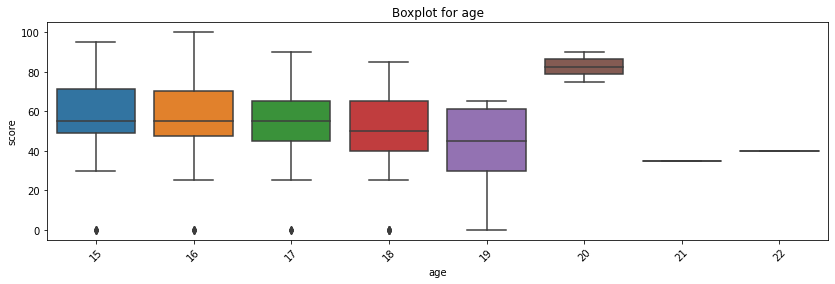

address


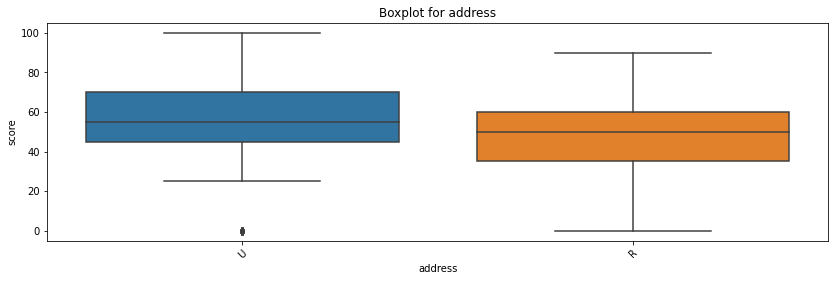

famsize


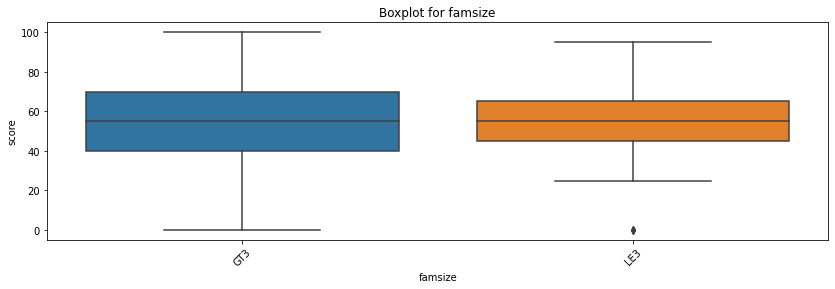

Pstatus


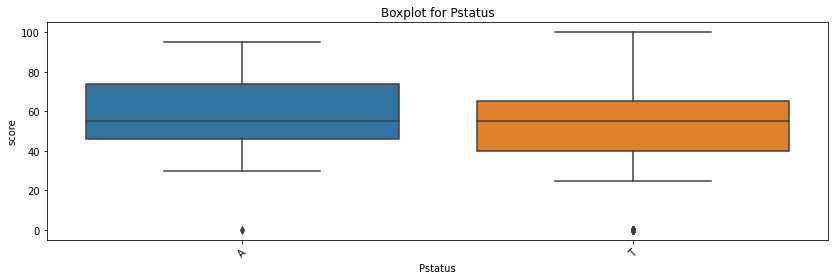

Medu


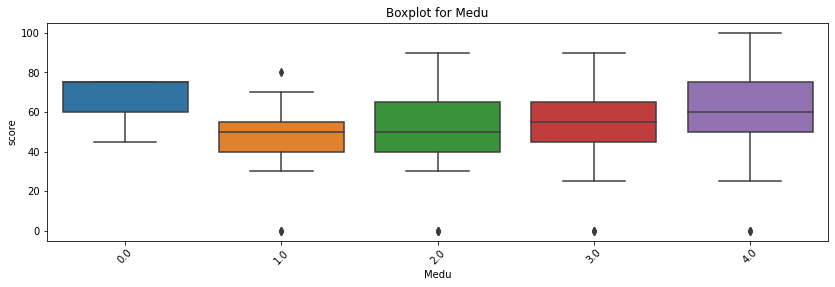

Fedu


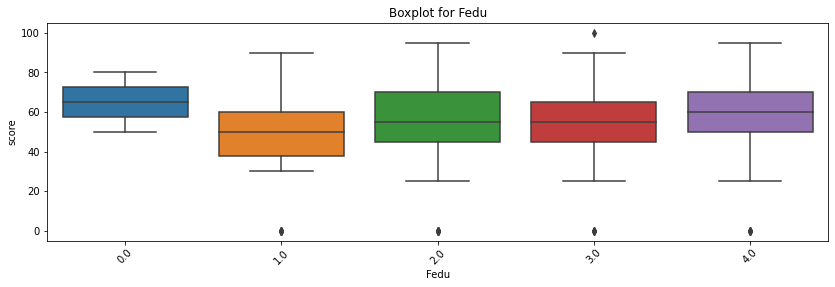

Mjob


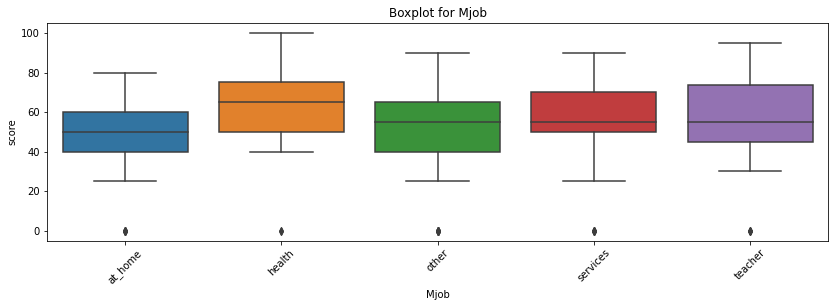

Fjob


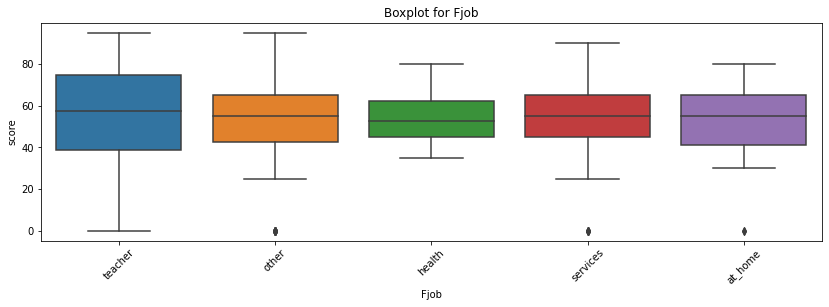

reason


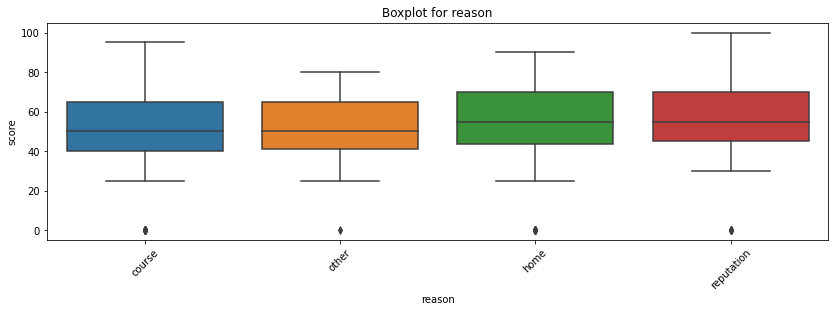

guardian


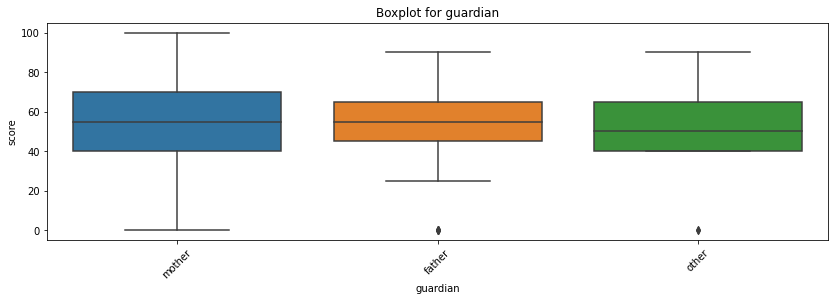

traveltime


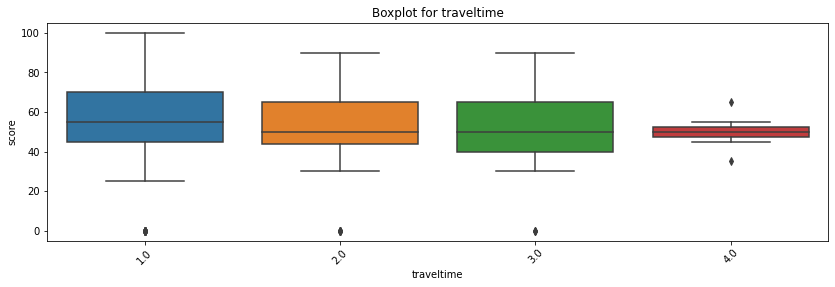

studytime


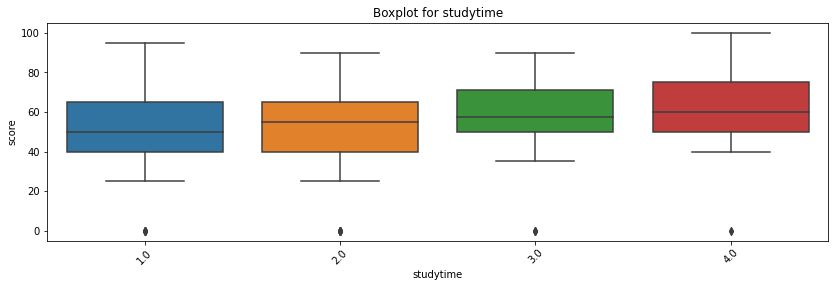

failures


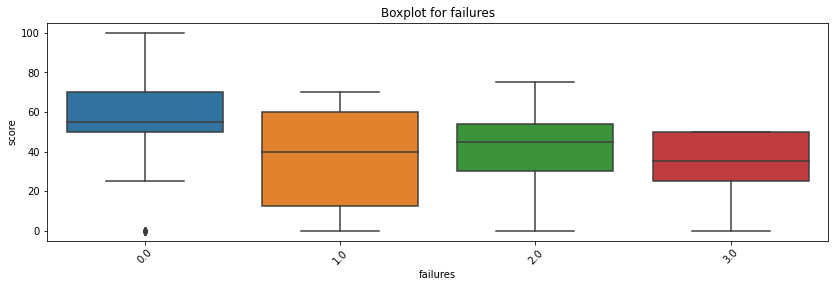

schoolsup


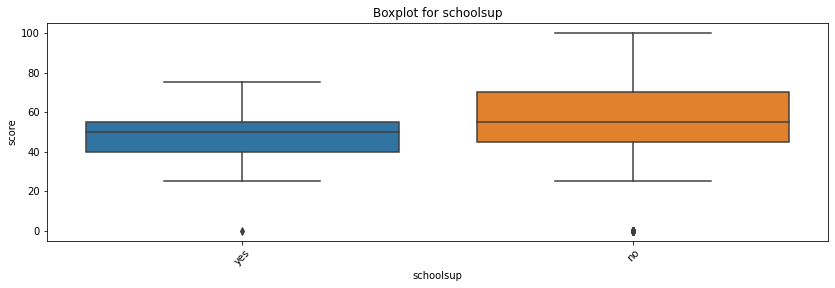

famsup


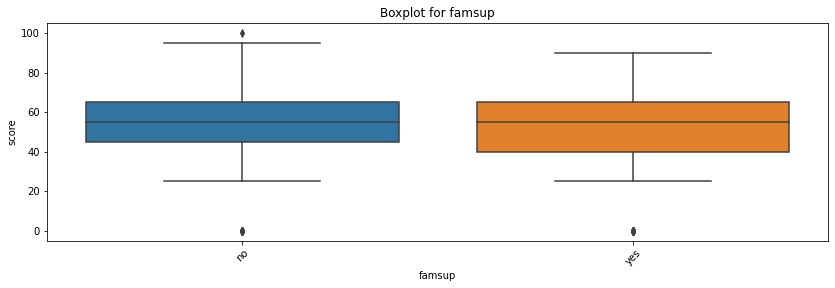

paid


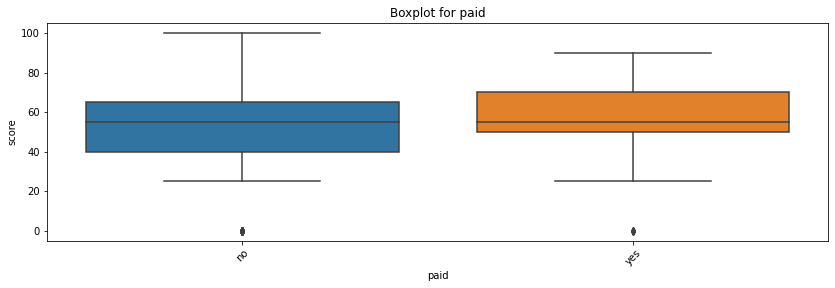

activities


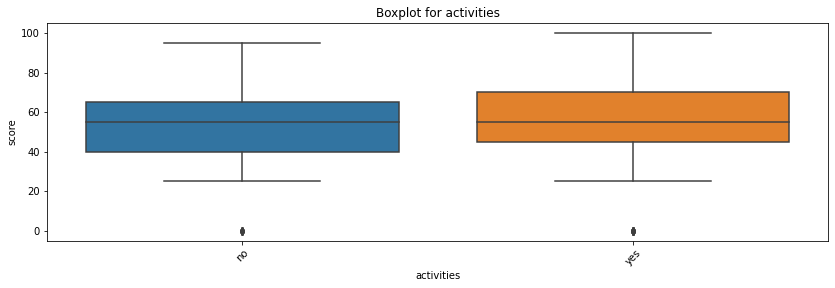

nursery


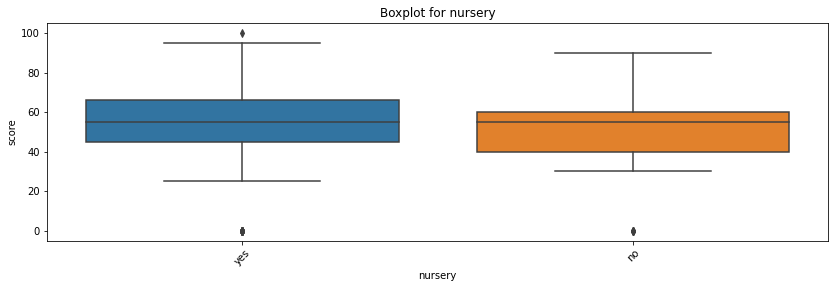

higher


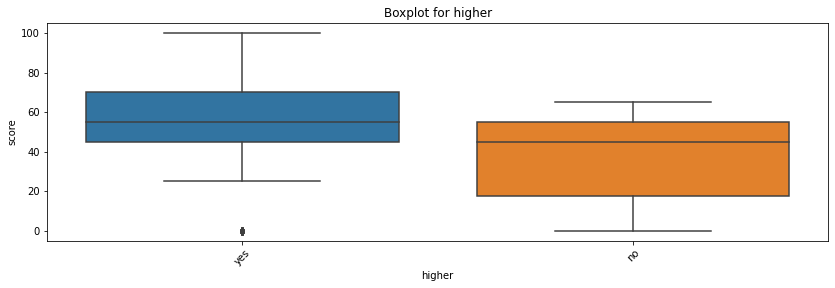

internet


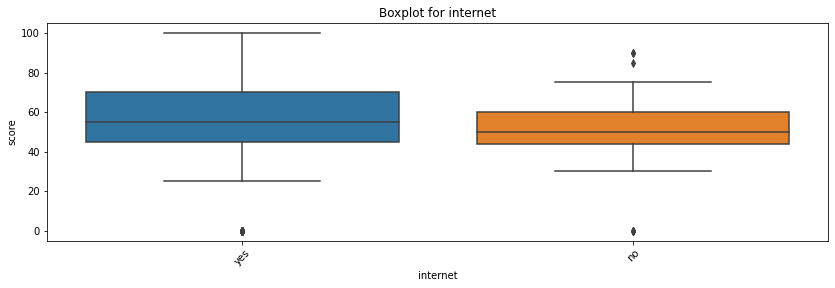

romantic


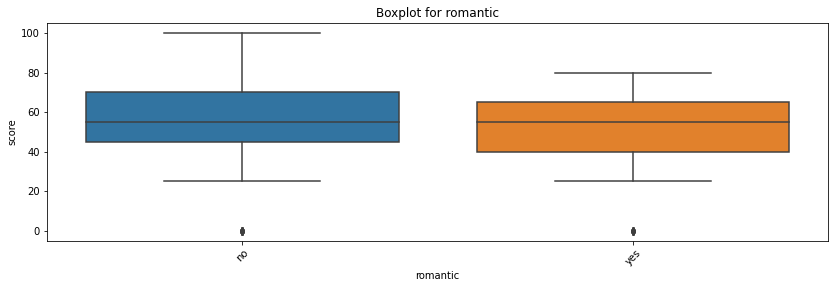

famrel


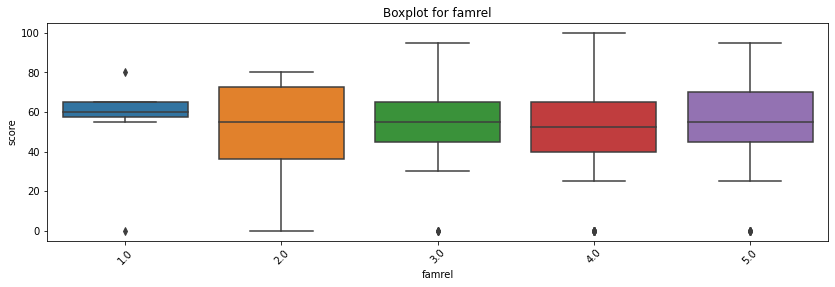

freetime


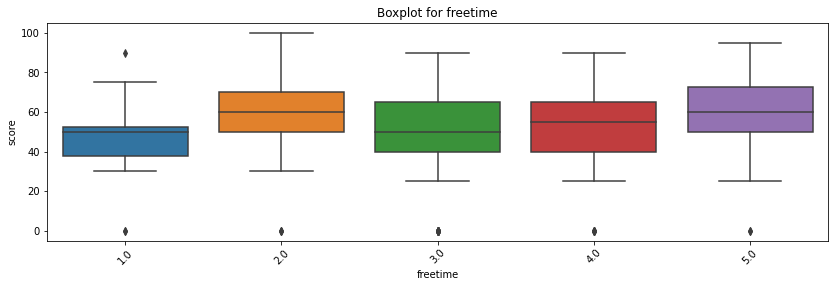

goout


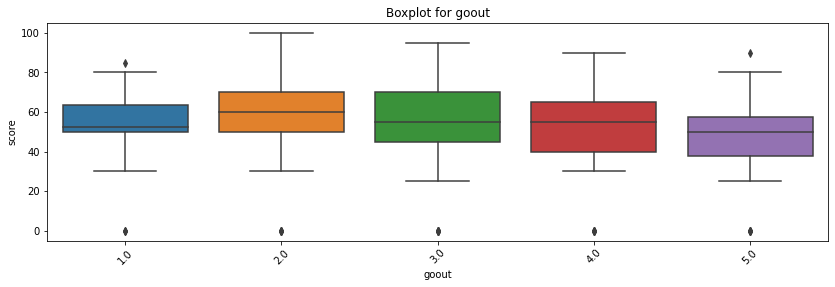

health


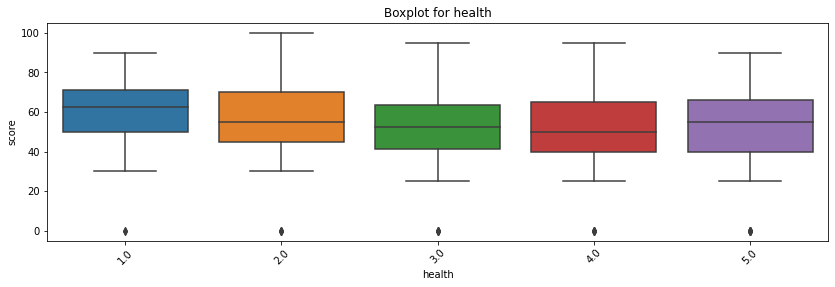

absences


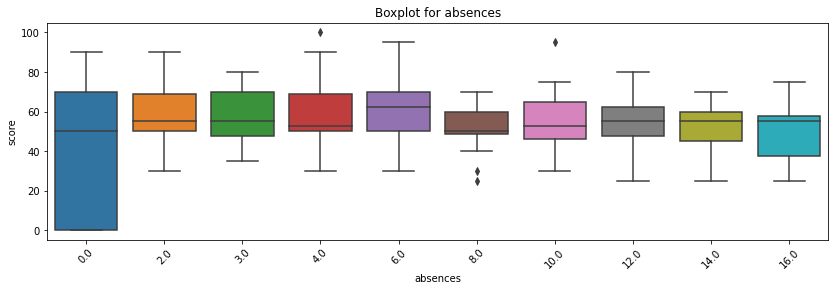

In [ ]:
for col in [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_boxplot(col)



На вскидку со **score** слабо коррелируют признаки:
- **school** В школе GP более сильная подготовка, но и там есть троешники
- **sex** Мальчики в целом добиваются лучших результатов
- **famsize** 50% очень близок, хоть и для многодетных распределение более гладкое
- **Pstatus** 50% очень близок для обоих групп
- **Fjob** 50% очень близок у всех, хоть и отцы-врачи совсем раздолбаев не воспитывают, а отцы-учителя могут в лучше подготовить если вообще занимаются
- **reason** Не зависимо от причины выбора школы результат образования без перекосов
- **guardian** Если опекун не родитель, то результат ниже среднего падать может только вдребезги
- **traveltime** выделяется лишь длительные поездки своей малочисленностью и дискретностью
- **famsup** Упорство семьи не способно победить ученика-барана. Личная мотивация важнее.
- **paid** Репититоры также слабее личной мотивации. Стоит ли тратить деньги?
- **activities** Доп занятия положительно сказываются на резьтатататах учёбы, но очень незначительно
- **nursery** Посещение детского сада также слабо связано с итоговым уровнем знаний
- **internet** бибилиотеки никто не отменял, и скоро интернет будет просто у всех
- **romantic** любовь дурманит голову, но статистически незначительно
- **health** влияет безхарактерно, но просто будьте все здоровы

Есть заметное влияние следующих признаков:
- **age** Ввиду малочисленности группы великовозрастных их стоит анализировать отдельно. Я бы даже 19 лет отдельно посмотрел, а то они както штрейхбрехерски пошли по наклонной.
- **address** городским видимо до бибилиотеки ближе или просто времени меньше зря тратят в поездках
- **Medu** и **Fedu** здесь ведут седя также кучно и уровень матери более гладко влияет начиная с "младшей школы" Особняком стоит случай совсем необразованных родителей
- **Mjob** для домохозяек вниз, для врачей вверх, что в свою очередь коррелирует с отцами медиками... чтото в этом есть
- **studytime** тут без положительной корреляции никуда.
- **failures** похоже личный стресс учит: в жизни есть вещи важнее образования
- **schoolsup** доп занятия в школе положительно влияют - продлёнке быть!
- **higher** личная мотивация на лицо
- **famrel** особняком стоят категории ниже среднего. Очень хочеться изучить корреляцию с возрастом
- **freetime** две волны, от нет до чуток и от средне до много но вторая более пологая
- **goout** чуток потусить с друзьями - норм, а вот постоянные вечеринки тянут вниз
- **absences** крепкий орешек, который легче выбросить, чем понять

Но и это ещё не всё. Натравим на данные натренированный тест Стьюдента

In [ ]:
def get_stat_dif(column):
    global students
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [ ]:
for col in [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_stat_dif(col)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 

6) Отбор не коррелирующих
===

7) Устранение не влияющих номинативных
===

8) Выводы
===